# Introduction

This notebook investigates the famous Fisher Iris dataset (Fisher, R. (1936). Iris [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.)

In [1]:
# First, import necessary libraries for importing data and whatever analysis follows
# will put these in a requirements file later
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder as le
from sklearn.linear_model import LinearRegression
import seaborn as sns


# Step 1: Acquiring the Data

The first step involves acquiring the data. 
Data has been downloaded from https://archive.ics.uci.edu/dataset/53/iris which includes the option to import data using python.


In [2]:
# ucimlrepo is a package for importing datasets from the the UC Irvine Machine Learning Repository.
# See: https://github.com/uci-ml-repo/ucimlrepo     
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch the datas. the ID specifies whic of the UCI datasets you want.
iris = fetch_ucirepo(id=53) 

The data that is fetched also contains metadata

In [4]:
# metadata contains details of the dataset including its main characterisics, shape, info on missing data, and relevant links (e.g. where to find raw data) 
# the meta data also contains detailed additional information including text descriptions of variables, funding sources, and the purpose of the data, 
print(iris.metadata) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [5]:
# lets take the data and save it to a variable called iris
iris = iris.data

# Step 2: Initial exploration of data package structure

In [6]:
# print iris to see what it contains
print(iris)

{'ids': None, 'features':      sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns], 'targets':               class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[

As shown above, when you load iris data it returns as a dictionary-like object which contains a list of features, a list of classes, and each instance of the dataset.
What do each of these elements represent?
- Each class represents a different species of iris
- Each feature represents a different measured aspect of the flowers
- Each instance represents a specific flower and the measurements of its features in centimeters.

Let's look at each of these below

In [7]:
# look at the features of the data. you can see the columns represent sepal length, sepal width, petal length, and petal width.
print(iris.features)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [8]:
# the targets are labels for the data. in this case, they are the species of iris flower (setosa, versicolor, virginica).
print(iris.targets)

              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


# Step 3: Explore and summarise the dataset

In [9]:
# I would like to have both the targets and features in one dataframe to make my analysis and code easier. 
# the code in x suggests putting the targets and features into x and y variables.
# data (as pandas dataframes) 
X = iris.features 
y = iris.targets 

In [10]:
# i then used these two variables to create a new dataframe called iris_df.
# we'll use the pandas function concat to do this. we'll specify we're joining on aixs=1, which means we're joining on the columns. 
# see: https://pandas.pydata.org/docs/user_guide/merging.html#joining-logic-of-the-resulting-axis 
iris_df = pd.concat([X, y], axis=1)

In [11]:
# let's explore our new dataframe. we'll start looking at the top and bottom 5 rows to get a sense of what the data looks like.

In [12]:
# return top 5 rows
# see: https://www.w3schools.com/python/pandas/ref_df_head.asp#:~:text=The%20head()%20method%20returns,a%20number%20is%20not%20specified.&text=Note%3A%20The%20column%20names%20will,addition%20to%20the%20specified%20rows.
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# return bottom 5 rows.
# https://www.w3schools.com/python/pandas/ref_df_tail.asp#:~:text=The%20tail()%20method%20returns,a%20number%20is%20not%20specified.
iris_df.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
# double check the types of data in iris. we can see that each column is a float64 type, except for the target/class column.
iris_df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

Now we will move on to summarizing the basic descriptive aspects of the dataset, which will tell us about the flowers themselves.

In [15]:
# Describe the data set. This will show basic descriptive statistics for each column in the dataframe.
# This includes the count, mean, standard deviation, min, max, and 25th, 50th, and 75th percentiles.
# see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html 
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# next check the shape of iris data, meaning how many rows and how many columns.
iris_df.shape

(150, 5)

In [17]:
# we can check for nulls by combining the ifnull function with the sum function
# see: https://www.w3schools.com/python/pandas/ref_df_isnull.asp 
# and https://www.w3schools.com/python/pandas/ref_df_sum.asp
print(iris_df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [18]:
# Describe has down us the mean, SD  and quartiles for each column. The 50% quartile is equivalent to the median. 
# Let's look other measures of distirbution for each column.

In [19]:
# the skew function will show us the skewness of the data. the skewness of a measure of how distributed the data is around the mean. 
# see: https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis 
# i want it for each column so im going to use for loop to save time. see: https://statisticsglobe.com/iterate-over-columns-pandas-dataframe-python 

# for each column in iris df, calculate the skewness and then print it out.  
for column in iris_df:
   if column != 'class': # first check if the column is not the class column. that has strings so won't work - learned this from earlier error. 
    skew = iris_df[column].skew()
    print (f"Skewness of {column}: {skew}")


Skewness of sepal length: 0.3149109566369728
Skewness of sepal width: 0.3340526621720866
Skewness of petal length: -0.27446425247378287
Skewness of petal width: -0.10499656214412734


In [20]:
# Similarly, we can check the data for kurtosis. According to data camp, "kurtosis focuses more on the height. It tells us how peaked or flat our normal (or normal-like) distribution is. 
# see https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis
# for each column in iris df, calculate the skewness and then print it out.  
for column in iris_df:
   if column != 'class': # first check if the column is not the class column. that has strings so won't work - learned this from earlier error. 
    kurtosis = iris_df[column].kurtosis()
    print (f"Kurtosis of {column}: {kurtosis}")

Kurtosis of sepal length: -0.5520640413156395
Kurtosis of sepal width: 0.2907810623654279
Kurtosis of petal length: -1.4019208006454036
Kurtosis of petal width: -1.3397541711393433


We can see from the analysis above that the mean and median are largely similar. Similarly, both our skewness and kurtosis are within normal range. These findingins indiate our data is fairly normally distributed and not impacted by many outliers (see: https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness)

The mean sepal length across the dataset is apprx. 5.6cm. The mean sepal width is approx. 3.1cm. While the means for petal length and width are 3.8cm and 1.2cm, resectively.

In [21]:
# The class column is a string variable and therefore we cannot calculate mean, median, skewness, or kurtosis as we did above. However, we can count the occurence of each value.
# the value_counts function will return a series containing counts of unique values. 
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html 
iris_df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Step 4: Visualize distribution

In this section, we will look at visualising the distribution of the dataset using histograms and boxplots. These visualizations compliment the analysis above.

In [23]:
# put the columns into their own variables so i can do a histogram for each. give them short names for sake of writing code later.
sl = iris_df['sepal length']
sw = iris_df['sepal width']
pl = iris_df['petal length']
pw = iris_df['petal width']

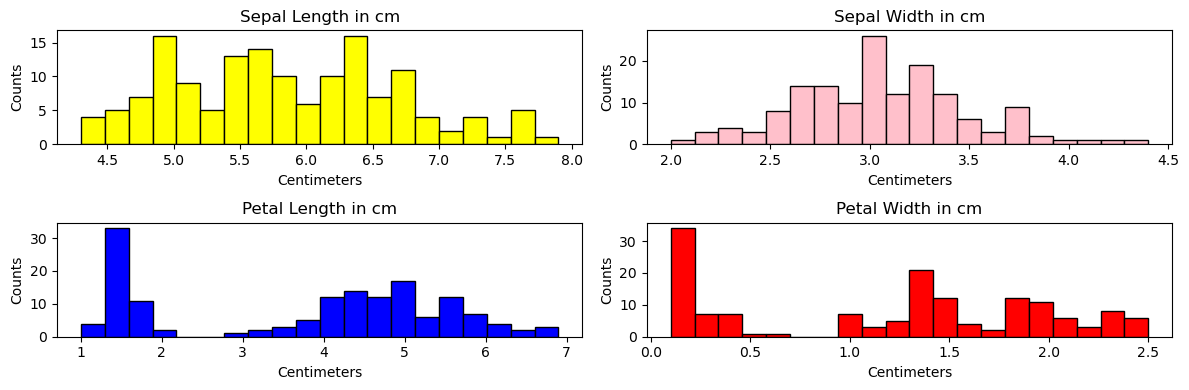

In [24]:
# for documentation on hist function, see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# for example of hist using iris see: https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/ 
# For example of plotting multiple hists on one plot see: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/  

# Creating subplots with multiple histograms. i have 4 things to display so i'm doing a 2x2 plot.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

# these axes figures dictate where on the plot the particular subplot will appear (e.g. 0,0 = first row, first column.)
# specify your datasource, number of bins, colour of bars, and colour of outline.
axes[0,0].hist(sl, bins=20, color='Yellow', edgecolor='black')
axes[0,0].set_title('Sepal Length in cm')
 
axes[0,1].hist(sw, bins=20, color='Pink', edgecolor='black')
axes[0,1].set_title('Sepal Width in cm')

axes[1,0].hist(pl, bins=20, color='Blue', edgecolor='black')
axes[1,0].set_title('Petal Length in cm')

axes[1,1].hist(pw, bins=20, color='Red', edgecolor='black')
axes[1,1].set_title('Petal Width in cm')

# Adding labels and title. initial error iterating over each subplot individually- code adjusted by Microsoft Co-Pilot.
for ax in axes.flat:
    ax.set_xlabel('Centimeters')
    ax.set_ylabel('Counts')

# Adjusting layout for better spacing. without this all the titles start overlapping.
plt.tight_layout()
 
# Display the figure
plt.show()